In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Train.csv")
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
data = data.drop(columns='ID')

KeyError: "['ID'] not found in axis"

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [8]:
data.isnull().values.sum()

1582

In [9]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [10]:
from scipy import stats
mode = stats.mode(data['Family_Size'])
md = mode[0][0]
values = {'Family_Size': md}
data.fillna(value=values, inplace = True)
data.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [13]:
nulls = ['Ever_Married','Profession', 'Graduated', 'Var_1']
cat_data = data.select_dtypes(include=['object']).copy()
for feature in nulls:
    cat_data = cat_data.fillna(cat_data[feature].value_counts().index[0])

In [14]:
cat_data.isnull().sum()

Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
Segmentation      0
dtype: int64

In [15]:
cat_data.columns.values

array(['Gender', 'Ever_Married', 'Graduated', 'Profession',
       'Spending_Score', 'Var_1', 'Segmentation'], dtype=object)

In [16]:
categoricals = cat_data.columns.values
for categorical in categoricals:
    data = data.drop(columns=categorical)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              8068 non-null   int64  
 1   Work_Experience  7239 non-null   float64
 2   Family_Size      8068 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 189.2 KB


In [18]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          8068 non-null   object
 1   Ever_Married    8068 non-null   object
 2   Graduated       8068 non-null   object
 3   Profession      8068 non-null   object
 4   Spending_Score  8068 non-null   object
 5   Var_1           8068 non-null   object
 6   Segmentation    8068 non-null   object
dtypes: object(7)
memory usage: 441.3+ KB


In [19]:
for categorical in categoricals:
    data.insert(1, categorical, cat_data[categorical], True)

In [20]:
def draw_bar_plot(feature, cat_data):
    feature_count = cat_data[feature].value_counts()
    guys = feature_count.index
    vals = feature_count.values
    plt.barh(guys,vals)
    plt.title(feature)
    plt.tight_layout()
    plt.show()
    
def draw_pie(feature, cat_data):
    feature_count = cat_data[feature].value_counts()
    guys = feature_count.index
    vals = feature_count.values
    plt.pie(vals, labels=guys, wedgeprops = {'edgecolor' : 'black'}, shadow=True, startangle=90)
    plt.title(feature)
    plt.tight_layout()
    plt.show()

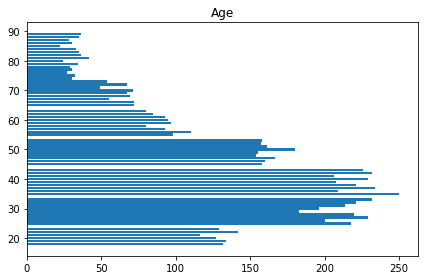

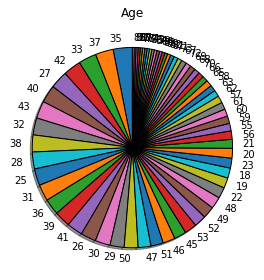

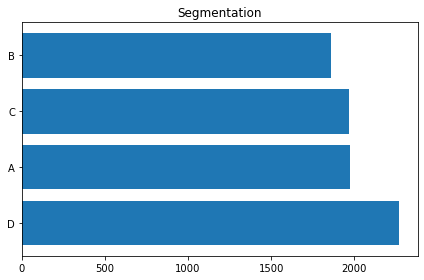

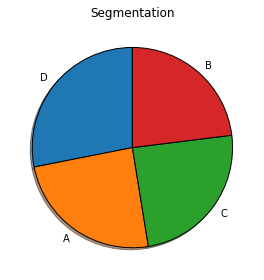

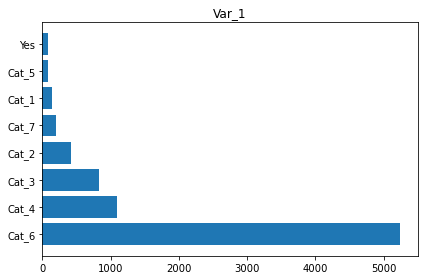

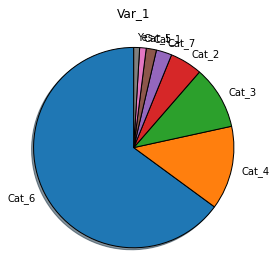

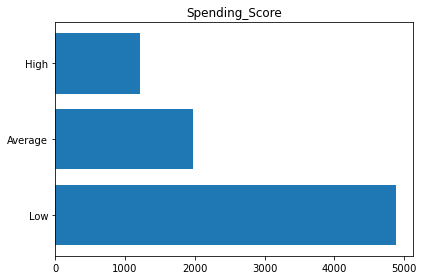

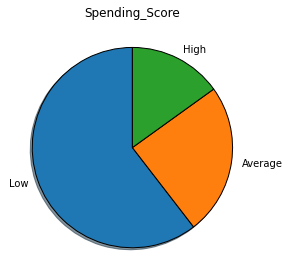

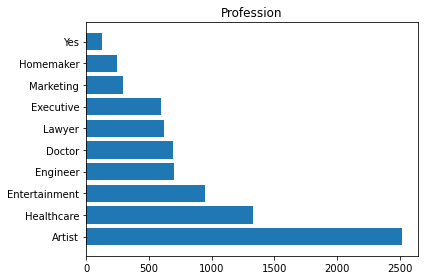

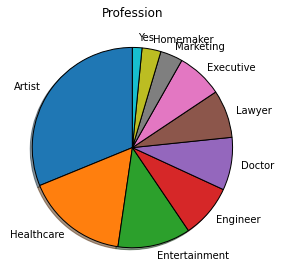

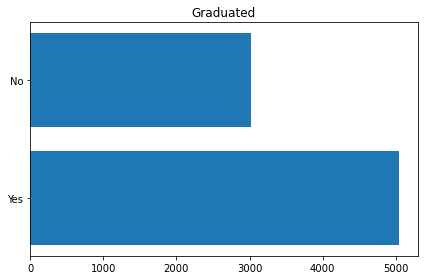

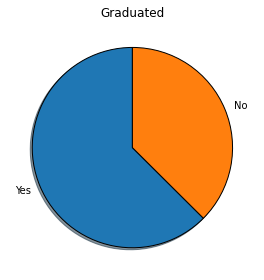

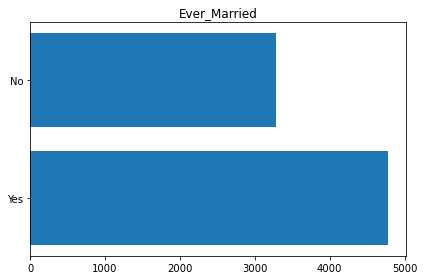

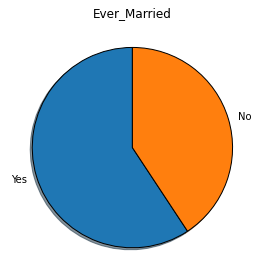

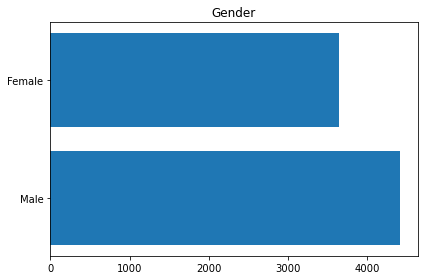

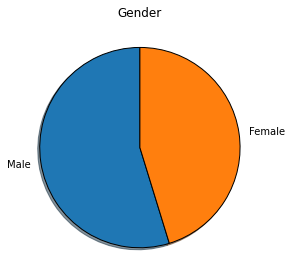

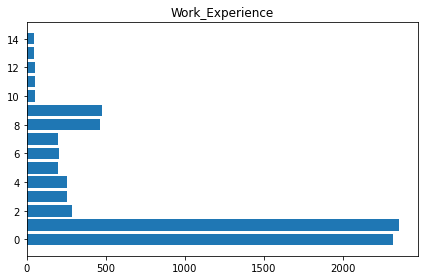

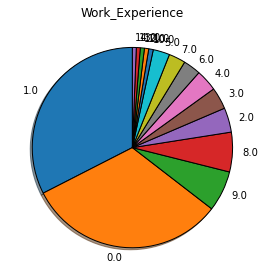

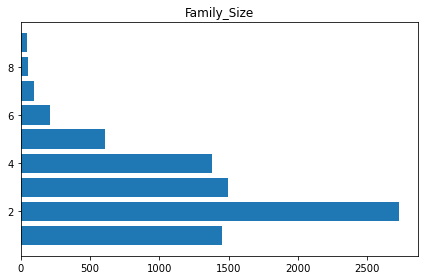

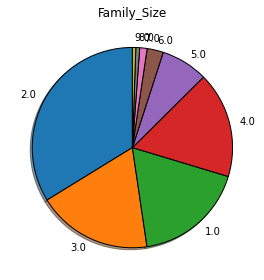

In [21]:
features = data.columns.values
for feature in features:
    draw_bar_plot(feature, data)
    draw_pie(feature, data)

In [22]:
data.isnull().sum()

Age                  0
Segmentation         0
Var_1                0
Spending_Score       0
Profession           0
Graduated            0
Ever_Married         0
Gender               0
Work_Experience    829
Family_Size          0
dtype: int64

In [23]:
data.head(1)

,Age,Segmentation,Var_1,Spending_Score,Profession,Graduated,Ever_Married,Gender,Work_Experience,Family_Size
0,22,D,Cat_4,Low,Healthcare,No,No,Male,1.0,4.0


In [24]:
from sklearn.preprocessing import LabelEncoder
categoricals = data.select_dtypes(include=['object']).columns.values
label_encoder = LabelEncoder()
for categorical in categoricals:
    data[categorical] = label_encoder.fit_transform(data[categorical])

In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [26]:
data.isnull().values.sum()

0

In [27]:
data.head(5)

,Age,Segmentation,Var_1,Spending_Score,Profession,Graduated,Ever_Married,Gender,Work_Experience,Family_Size
0,22.0,3.0,3.0,2.0,5.0,0.0,0.0,1.0,1.0,4.0
1,38.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,3.4,3.0
2,67.0,1.0,5.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0
3,67.0,1.0,5.0,1.0,7.0,1.0,1.0,1.0,0.0,2.0
4,40.0,0.0,5.0,1.0,3.0,1.0,1.0,0.0,5.2,6.0


In [42]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
mms.fit(data)
data = mms.transform(data)

In [52]:
%matplotlib inline

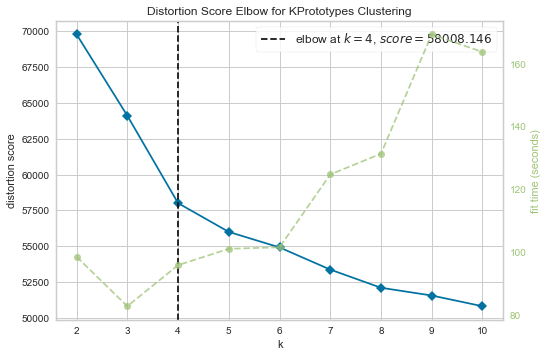

In [50]:
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KPrototypes(), k=10)
model.fit(data,categorical=[1,2,3,4,5,6,7,8])
model.show()